<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Handwritten_Digit_Recognition(0_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Advanced Learning Algorithms/Week 2'
os.chdir(new_directory)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision = 2)

In [9]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [10]:
z = np.array([1.,2.,3.,4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my softmax:  {a}")
print(f"tensorflow softmax:  {atf}")

my softmax:  [0.03 0.09 0.24 0.64]
tensorflow softmax:  [0.03 0.09 0.24 0.64]


In [14]:
X, y = load_data()
X.shape

(5000, 400)

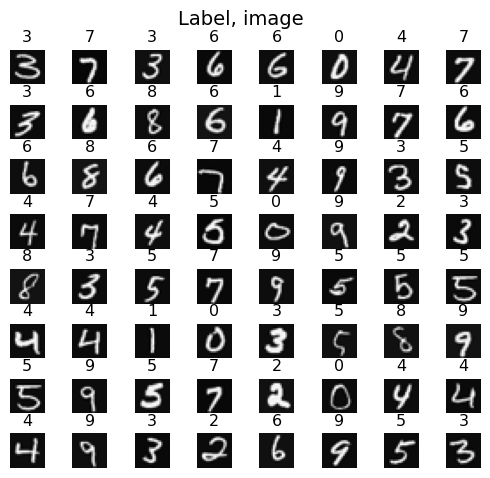

In [20]:
m,n = X.shape
fig,axes = plt.subplots(8,8, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect = [0,0.03,1,0.91])

widgvis(fig)
for i, ax in enumerate(axes.flat):
    random_index= np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap = 'gray')
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize = 14)